# Investigate CLIP text embeddings

run the following script to generate the embeddings of positive and negative samples.  

A positive sample refers to a pair of (image, text) where the content of the image corresponds to the text, while the negative sample is the one that does not match.

The distance to see if the image and text match is computed by the cosine distance (dot product) between the embeddings of the image and text.

Then, the sample mean of the distance is computed for each batch. The distance will be saved in 'clip_embeddings.csv' with positive column and negative column. Each line is a batch through the CLIP model.  


In [1]:
# sbatch /user/home/pu22650/clip-binding/Investigate_CLIP_embeddings.py

## Lib

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

## Plot

To see wether CLIP can distinguish the positive and negative samples, we plot the distribution of positive and negative samples mean. and fit the pdf of them.

### Train

In [37]:
def plot_hist(df, file_path):
    fig, ax = plt.subplots(3, 2, figsize=(10, 10))
    ax[0,0].set_title("histogram of aRb")
    hist_aRb = ax[0,0].hist(df['aRb'], bins='auto', density=True, label='aRb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['red'])
    ax[0,1].set_title("histogram of bRa")
    hist_bRa = ax[0,1].hist(df['bRa'], bins='auto', density=True, label='bRa hist', alpha = 0.3, color=mcolors.CSS4_COLORS['lime'])
    ax[1, 0].set_title("histogram of aSb")
    hist_aSb = ax[1, 0].hist(df['aSb'], bins='auto', density=True, label='aSb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['cyan'])
    ax[1, 1].set_title("histogram of cRb")
    hist_cRb = ax[1, 1].hist(df['cRb'], bins='auto', density=True, label='cRb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['orange'])
    ax[2, 0].set_title("histogram of aRc")
    hist_aRc = ax[2, 0].hist(df['aRc'], bins='auto', density=True, label='aRc hist', alpha = 0.3, color=mcolors.CSS4_COLORS['blue'])
    ax[2,1].set_title("hist of all")
    hist_aRb = ax[2,1].hist(df['aRb'], bins='auto', density=True, label='aRb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['red'])
    hist_bRa = ax[2,1].hist(df['bRa'], bins='auto', density=True, label='bRa hist', alpha = 0.3, color=mcolors.CSS4_COLORS['lime'])
    hist_aSb = ax[2,1].hist(df['aSb'], bins='auto', density=True, label='aSb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['cyan'])
    hist_cRb = ax[2,1].hist(df['cRb'], bins='auto', density=True, label='cRb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['orange'])
    hist_aRc = ax[2,1].hist(df['aRc'], bins='auto', density=True, label='aRc hist', alpha = 0.3, color=mcolors.CSS4_COLORS['blue'])
    
    fig.savefig(f"{file_path.split('.')[0].split('_')[-1]}_hist.pdf")

In [38]:
def normal_dist(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma)

X = np.linspace(0, 50, 500)

def plot_label_dist(ax, df_label, label, color=mcolors.CSS4_COLORS['red'], alpha=0.3):
    hist = ax.hist(df_label, bins='auto', density=True, label=f'{label} hist', alpha = alpha, color=color)
    dist = stats.rv_histogram(hist[:2])
    ax.plot(X, normal_dist(X, dist.mean(), dist.std()), label=f'pdf of {label}', color=color)
    ax.vlines(dist.mean(), 0, 3, colors=color, label=f'{label} mean', linestyle='--')
    print(f"mean value of {label} distribution:", dist.mean(), f"standard error of {label} distribution:", dist.std())

In [39]:
def plot_dist(df, file_path):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("distribution of dot product distance of CLIP embeddings between image and text")
    plot_label_dist(ax, df['aRb'], 'aRb', color=mcolors.CSS4_COLORS['red'])
    plot_label_dist(ax, df['bRa'], 'bRa', color=mcolors.CSS4_COLORS['lime'])
    plot_label_dist(ax, df['aSb'], 'aSb', color=mcolors.CSS4_COLORS['cyan'])
    plot_label_dist(ax, df['cRb'], 'cRb', color=mcolors.CSS4_COLORS['orange'])
    plot_label_dist(ax, df['aRc'], 'aRc', color=mcolors.CSS4_COLORS['blue'])
    ax.legend()
    ax.set_xlabel('distance')
    ax.set_ylabel('probability density')
    if 'train' in file_path:
        ax.set_xlim(10, 35)
        ax.set_ylim(0, 0.25)
    elif 'test' in file_path:
        ax.set_xlim(10, 35)
        ax.set_ylim(0, 0.4)
    else:
        ax.set_xlim(7, 38)
        ax.set_ylim(0, 0.4)
    fig.show()
    print()
    fig.savefig(f"{file_path.split('.')[0].split('_')[-1]}_dist.pdf")

mean value of aRb distribution: 22.603936756310098 standard error of aRb distribution: 3.83767104820253
mean value of bRa distribution: 22.742751276041666 standard error of bRa distribution: 3.297668844910299
mean value of aSb distribution: 22.744546972656245 standard error of aSb distribution: 3.2975991262375155
mean value of cRb distribution: 20.585848765120975 standard error of cRb distribution: 3.7946891595166297
mean value of aRc distribution: 21.159279367897728 standard error of aRc distribution: 3.3421591301672784

mean value of aRb distribution: 20.063775398284317 standard error of aRb distribution: 2.026496323877134
mean value of bRa distribution: 20.71628542564655 standard error of bRa distribution: 1.5971964893640749
mean value of aSb distribution: 20.71808814655173 standard error of aSb distribution: 1.5983193538827738
mean value of cRb distribution: 23.70824076891448 standard error of cRb distribution: 2.580166336685293
mean value of aRc distribution: 17.196853636853444 st

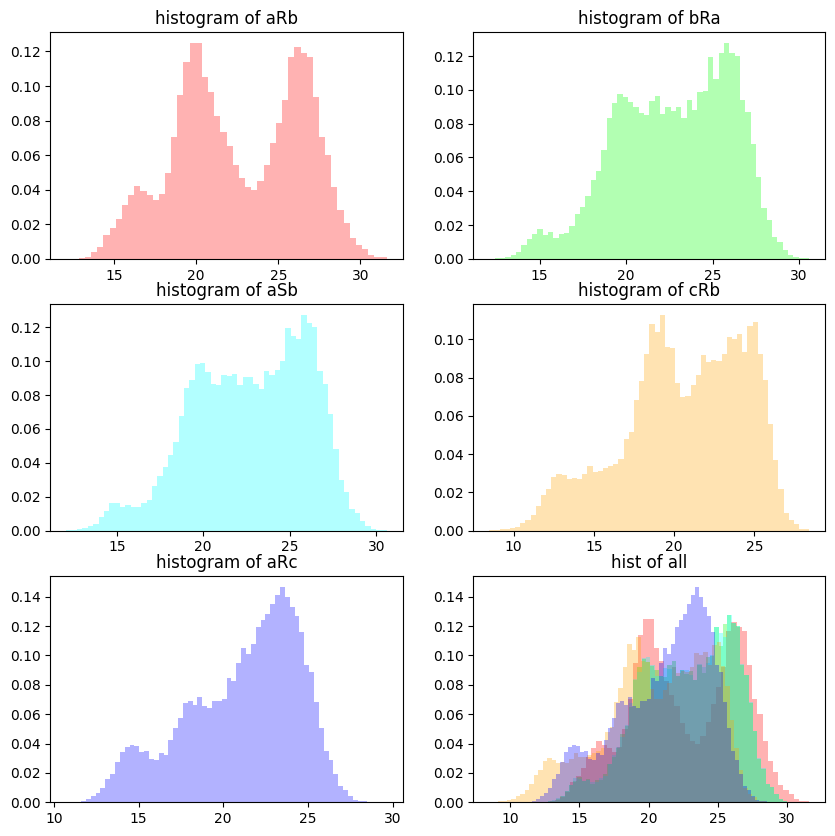

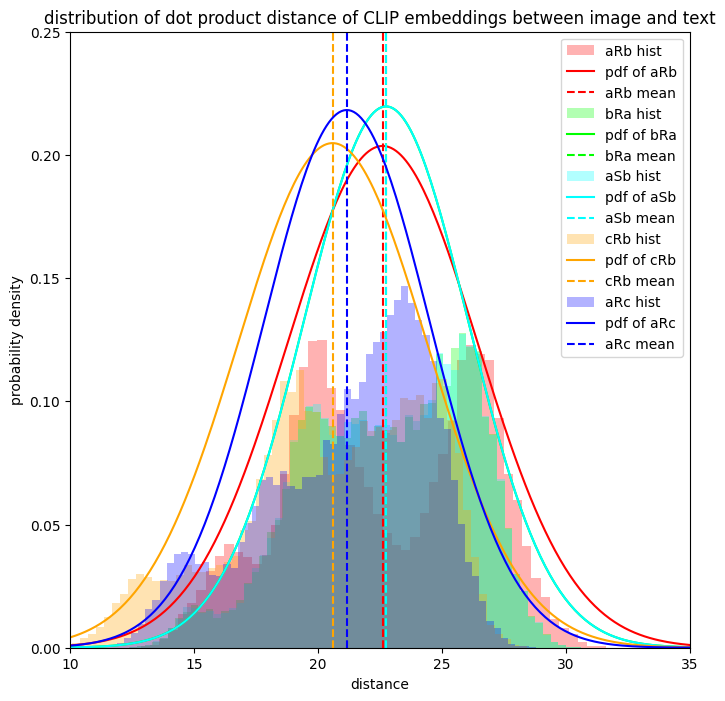

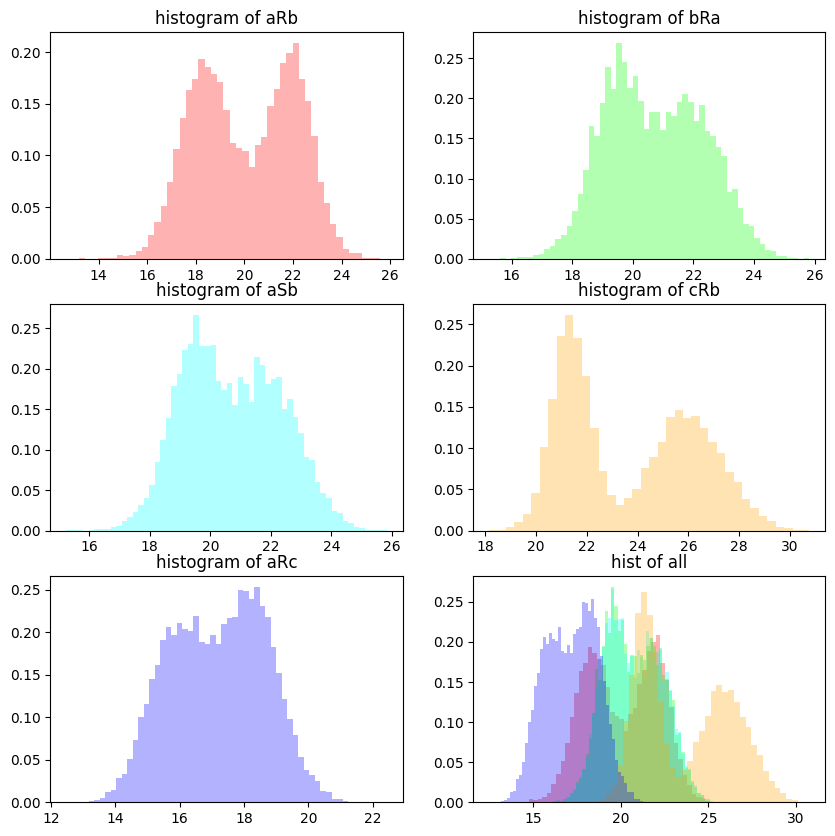

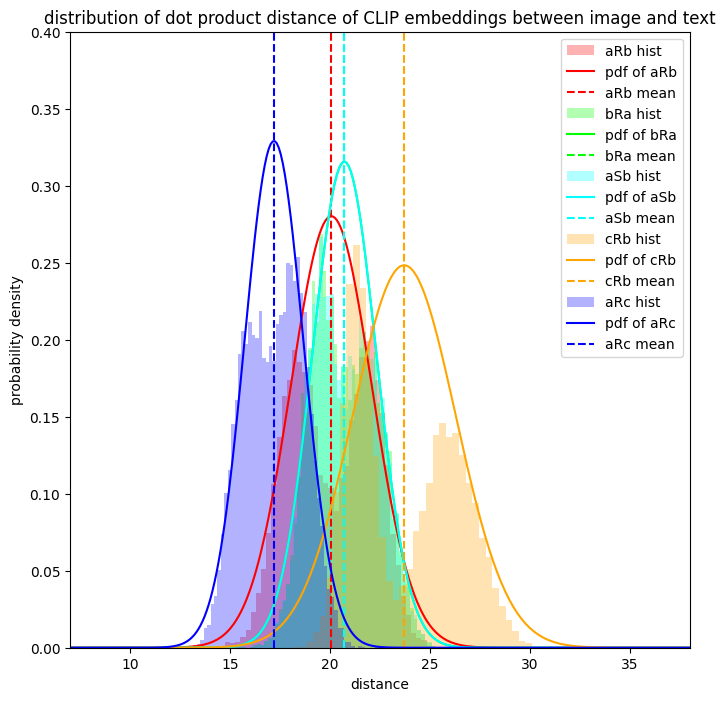

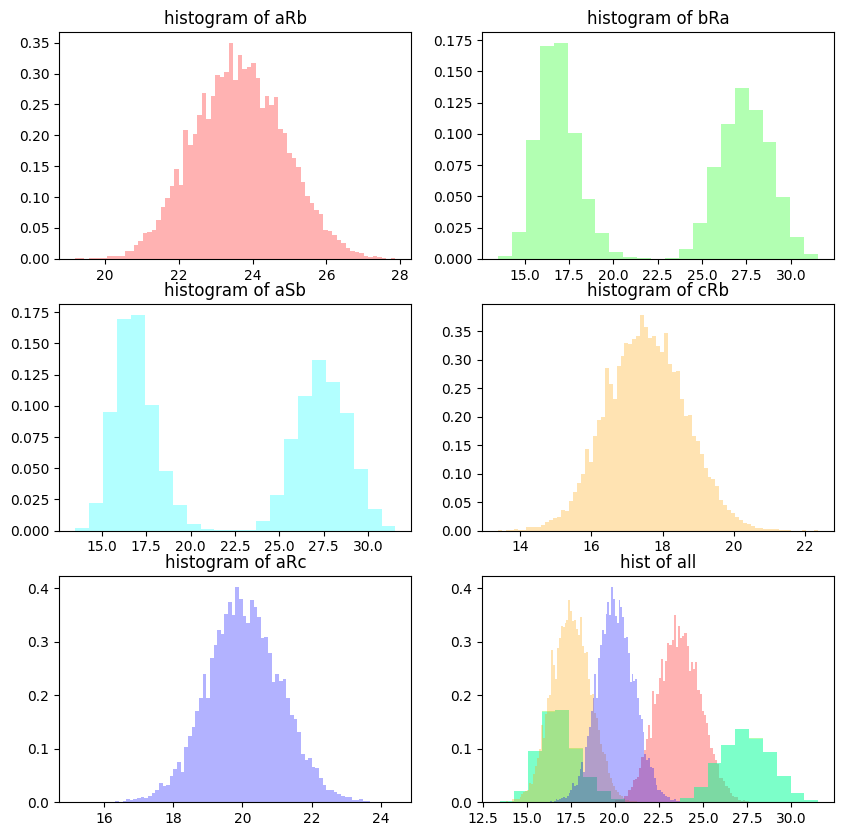

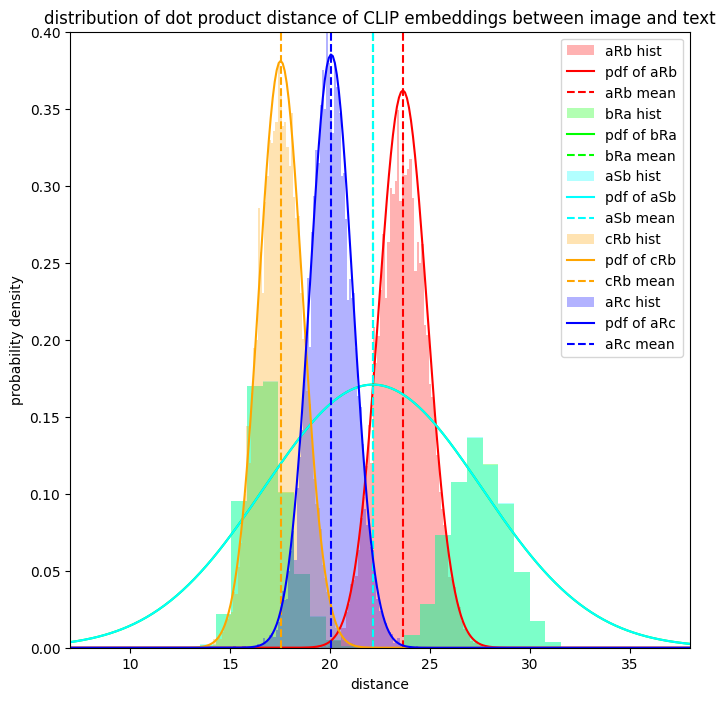

In [40]:
file_path_list = ['clip_embeddings_distance_sample_mean_train.csv', 'clip_embeddings_distance_sample_mean_val.csv', 'clip_embeddings_distance_sample_mean_gen.csv']
for file_path in file_path_list:
    df = pd.read_csv(file_path)
    plot_hist(df, file_path)
    plot_dist(df, file_path)

In [17]:
df = pd.read_csv(file_path_list[0])

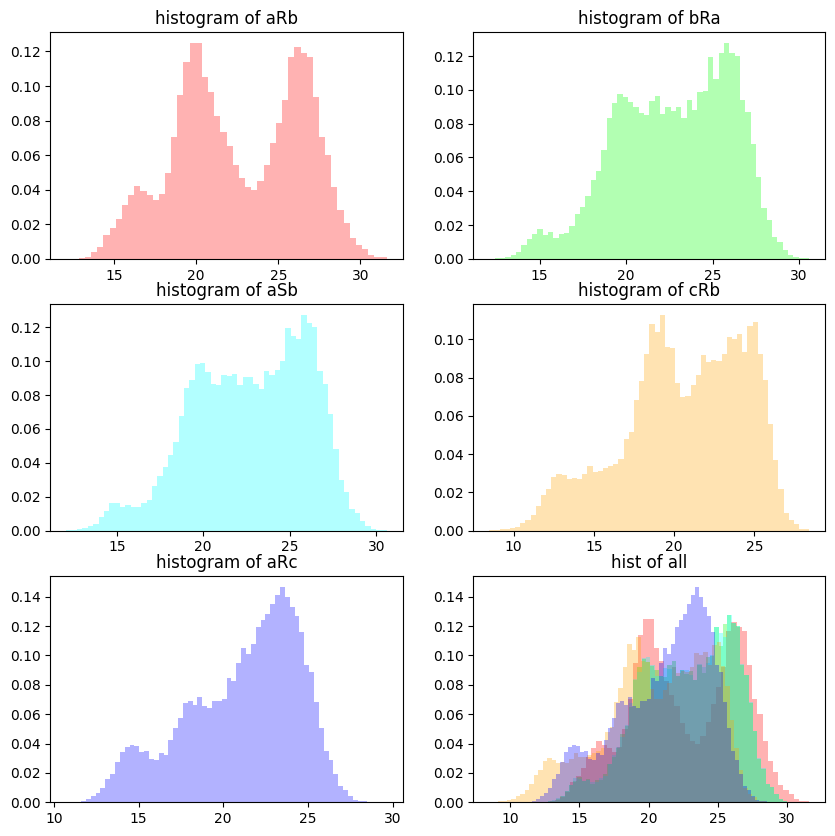

In [18]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax[0,0].set_title("histogram of aRb")
hist_aRb = ax[0,0].hist(df['aRb'], bins='auto', density=True, label='aRb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['red'])
ax[0,1].set_title("histogram of bRa")
hist_bRa = ax[0,1].hist(df['bRa'], bins='auto', density=True, label='bRa hist', alpha = 0.3, color=mcolors.CSS4_COLORS['lime'])
ax[1, 0].set_title("histogram of aSb")
hist_aSb = ax[1, 0].hist(df['aSb'], bins='auto', density=True, label='aSb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['cyan'])
ax[1, 1].set_title("histogram of cRb")
hist_cRb = ax[1, 1].hist(df['cRb'], bins='auto', density=True, label='cRb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['orange'])
ax[2, 0].set_title("histogram of aRc")
hist_aRc = ax[2, 0].hist(df['aRc'], bins='auto', density=True, label='aRc hist', alpha = 0.3, color=mcolors.CSS4_COLORS['blue'])
ax[2,1].set_title("hist of all")
hist_aRb = ax[2,1].hist(df['aRb'], bins='auto', density=True, label='aRb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['red'])
hist_bRa = ax[2,1].hist(df['bRa'], bins='auto', density=True, label='bRa hist', alpha = 0.3, color=mcolors.CSS4_COLORS['lime'])
hist_aSb = ax[2,1].hist(df['aSb'], bins='auto', density=True, label='aSb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['cyan'])
hist_cRb = ax[2,1].hist(df['cRb'], bins='auto', density=True, label='cRb hist', alpha = 0.3, color=mcolors.CSS4_COLORS['orange'])
hist_aRc = ax[2,1].hist(df['aRc'], bins='auto', density=True, label='aRc hist', alpha = 0.3, color=mcolors.CSS4_COLORS['blue'])

it is not a norm dist

In [11]:
def normal_dist(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma)

X = np.linspace(0, 50, 500)

def plot_label_dist(ax, df_label, label, color=mcolors.CSS4_COLORS['red'], alpha=0.3):
    hist = ax.hist(df_label, bins='auto', density=True, label=f'{label} hist', alpha = alpha, color=color)
    dist = stats.rv_histogram(hist[:2])
    ax.plot(X, normal_dist(X, dist.mean(), dist.std()), label=f'pdf of {label}', color=color)
    ax.vlines(dist.mean(), 0, 3, colors=color, label=f'{label} mean', linestyle='--')
    print(f"mean value of {label} distribution:", dist.mean(), f"standard error of {label} distribution:", dist.std())

mean value of aRb distribution: 22.603936756310098 standard error of aRb distribution: 3.83767104820253
mean value of bRa distribution: 22.742751276041666 standard error of bRa distribution: 3.297668844910299
mean value of aSb distribution: 22.744546972656245 standard error of aSb distribution: 3.2975991262375155
mean value of cRb distribution: 20.585848765120975 standard error of cRb distribution: 3.7946891595166297
mean value of aRc distribution: 21.159279367897728 standard error of aRc distribution: 3.3421591301672784


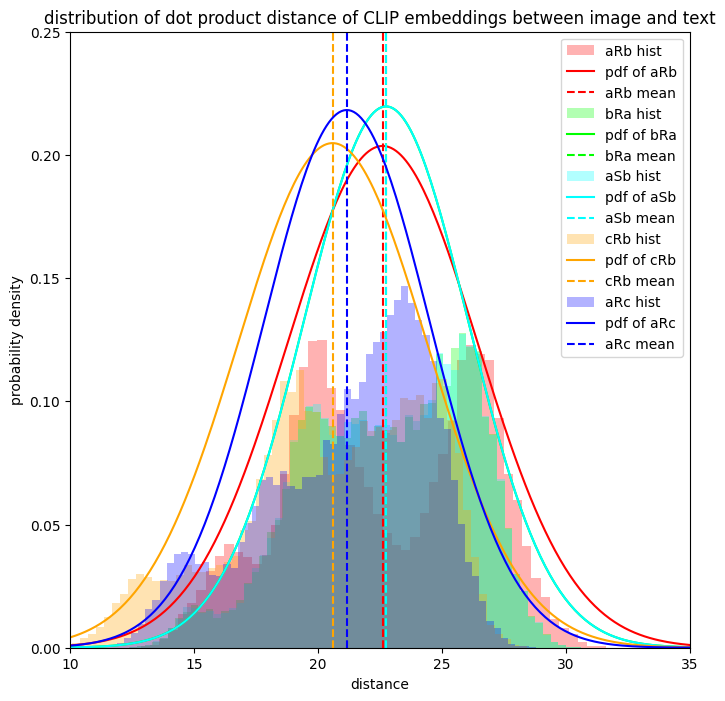

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("distribution of dot product distance of CLIP embeddings between image and text")
plot_label_dist(ax, df['aRb'], 'aRb', color=mcolors.CSS4_COLORS['red'])
plot_label_dist(ax, df['bRa'], 'bRa', color=mcolors.CSS4_COLORS['lime'])
plot_label_dist(ax, df['aSb'], 'aSb', color=mcolors.CSS4_COLORS['cyan'])
plot_label_dist(ax, df['cRb'], 'cRb', color=mcolors.CSS4_COLORS['orange'])
plot_label_dist(ax, df['aRc'], 'aRc', color=mcolors.CSS4_COLORS['blue'])
ax.legend()
ax.set_xlabel('distance')
ax.set_ylabel('probability density')
ax.set_xlim(10, 35)
ax.set_ylim(0, 0.25)
fig.show()